In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

# Load Data

In [0]:
times_data = pd.read_excel( 'data/time_world_university_rankings_2011-2016.xlsx' )

In [0]:
times_data

,World_Rank,University_Name,Country,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Total_Score,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57,91.2,18812.0,11.8,34.0,46,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34.0,46,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,36186.0,16.4,15.0,50,2011
8,9,Imperial College London,United Kingdom,89.2,90,94.5,88.3,92.9,90.6,15060.0,11.7,51.0,37,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,11751.0,4.4,20.0,50,2011


# Analyze the Data

In [0]:
# Convert strs to floats when necessary
processed_rankings = []
for rank in times_data['World_Rank'].values:
    if isinstance( rank, str ):
        processed_rankings.append( int( rank.split( '-' )[0] ) )
    else:
        processed_rankings.append( rank )

In [0]:
# Find and mask data where there's no total score
no_value = times_data['Total_Score'].values == '-'
rankings_ma = np.ma.masked_array( processed_rankings, no_value )
score_ma = np.ma.masked_array( times_data['Total_Score'].values, no_value )

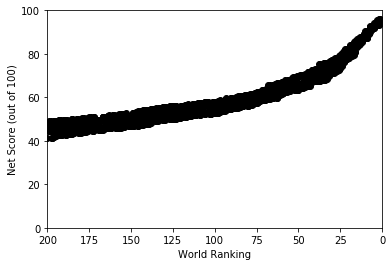

In [0]:
fig = plt.Figure( figsize=(15,15), facecolor='white' )
ax = plt.gca()

ax.scatter(
    rankings_ma,
    score_ma,
    color = 'k',
)

ax.invert_xaxis()

ax.set_xlim( 200, 0 )
ax.set_ylim( 0, 100 )

ax.set_xlabel( 'World Ranking' )
ax.set_ylabel( 'Net Score (out of 100)')

This is interesting... The score actually steepens with higher university rankings, instead of flattening.
This implies that low ranking colleges are all more likely to be similar, but that there's a real difference between top colleges. However, I'm not sure this is actually a real trend. The entire business model of having a ratings system is supposedly being able to distinguish between top colleges. As such, there's no way there could be anything other than a steep slope at the high end, even if it doesn't actually exist. I will add that I have a bias, since my personal experience leads me to believe there shouldn't be a steep slope at the high end.